# 异常检测——基于相似度的方法

**主要内容包括：**

- 基于距离的度量
- 基于密度的度量


## 1、概述

“异常”通常是一个主观的判断，什么样的数据被认为是“异常”的，需要结合业务背景和环境来具体分析确定。 
实际上，数据通常嵌入在大量的噪声中，而我们所说的“异常值”通常指具有特定业务意义的那一类特殊的异常值。噪声可以视作特性较弱的异常值，没有被分析的价值。噪声和异常之间、正常数据和噪声之间的边界都是模糊的。异常值通常具有更高的离群程度分数值，同时也更具有可解释性。    
在普通的数据处理中，我们常常需要保留正常数据，而对噪声和异常值的特性则基本忽略。但在异常检测中，我们弱化了“噪声”和“正常数据”之间的区别，专注于那些具有有价值特性的异常值。在基于相似度的方法中，主要思想是异常点的表示与正常点不同



## 2、基于距离的度量 

基于距离的方法是一种常见的适用于各种数据域的异常检测算法，它基于最近邻距离来定义异常值。 此类方法不仅适用于多维数值数据，在其他许多领域，例如分类数据，文本数据，时间序列数据和序列数据等方面也有广泛的应用。
基于距离的异常检测有这样一个前提假设，即异常点的 $k$ 近邻距离要远大于正常点。解决问题的最简单方法是使用嵌套循环。 第一层循环遍历每个数据，第二层循环进行异常判断，需要计算当前点与其他点的距离，一旦已识别出多于 $k$ 个数据点与当前点的距离在 $D$ 之内，则将该点自动标记为非异常值。 这样计算的时间复杂度为$O(N^{2})$，当数据量比较大时，这样计算是及不划算的。 因此，需要修剪方法以加快距离计算。

### 2.1 基于单元的方法

在基于单元格的技术中，数据空间被划分为单元格，单元格的宽度是阈值D和数据维数的函数。具体地说，每个维度被划分成宽度最多为 $\frac{D}{{2 \cdot \sqrt d }}$ 单元格。在给定的单元以及相邻的单元中存在的数据点满足某些特性，这些特性可以让数据被更有效的处理。

以二维情况为例，此时网格间的距离为 $\frac{D}{{2 \cdot \sqrt d }}$ ，需要记住的一点是，网格单元的数量基于数据空间的分区，并且与数据点的数量无关。这是决定该方法在低维数据上的效率的重要因素，在这种情况下，网格单元的数量可能不多。 另一方面，此方法不适用于更高维度的数据。对于给定的单元格，其 $L_{1}$ 邻居被定义为通过最多1个单元间的边界可从该单元到达的单元格的集合。请注意，在一个角上接触的两个单元格也是 $L_{1}$ 邻居。  $L_{2}$ 邻居是通过跨越2个或3个边界而获得的那些单元格。 上图中显示了标记为 $X$的特定单元格及其 $L_{1}$ 和 $L_{2}$ 邻居集。 显然，内部单元具有8个 $L_{1}$ 邻居和40个 $L_{2}$ 邻居。 然后，可以立即观察到以下性质：

- 单元格中两点之间的距离最多为 $D/2$。
- 一个点与 $L_{1}$ 邻接点之间的距离最大为 $D$。
- 一个点与它的 $Lr$ 邻居(其中$r$ > 2)中的一个点之间的距离至少为$D$。

唯一无法直接得出结论的是 $L_{2}$ 中的单元格。 这表示特定单元中数据点的不确定性区域。 对于这些情况，需要明确执行距离计算。 同时，可以定义许多规则，以便立即将部分数据点确定为异常值或非异常值。 规则如下：

-  如果一个单元格中包含超过 $k$ 个数据点及其  $L_{1}$ 邻居，那么这些数据点都不是异常值。
-  如果单元 $A$ 及其相邻 $L_{1}$ 和 $L_{2}$ 中包含少于 $k$ 个数据点，则单元A中的所有点都是异常值。

此过程的第一步是将部分数据点直接标记为非异常值（如果由于第一个规则而导致它们的单元格包含 $k$ 个点以上）。 此外，此类单元格的所有相邻单元格仅包含非异常值。 为了充分利用第一条规则的修剪能力，确定每个单元格及其 $L_{1}$ 邻居中点的总和。 如果总数大于 $k$ ，则所有这些点也都标记为非离群值。

接下来，利用第二条规则的修剪能力。 对于包含至少一个数据点的每个单元格 $A$，计算其中的点数及其   $L_{1}$ 和  $L_{2}$ 邻居的总和。 如果该数字不超过 $k$，则将单元格$A$ 中的所有点标记为离群值。 此时，许多单元可能被标记为异常值或非异常值。 

对于此时仍未标记为异常值或非异常值的单元格中的数据点需要明确计算其 $k$ 最近邻距离。即使对于这样的数据点，通过使用单元格结构也可以更快地计算出 $k$ 个最近邻的距离。考虑到目前为止尚未被标记为异常值或非异常值的单元格$A$。这样的单元可能同时包含异常值和非异常值。单元格 $A$ 中数据点的不确定性主要存在于该单元格的 $L_{2}$ 邻居中的点集。无法通过规则知道 $A$ 的 $L_{2}$ 邻居中的点是否在阈值距离 $D$ 内，为了确定单元 $A$ 中数据点与其$L_{2}$ 邻居中的点集在阈值距离 $D$ 内的点数，需要进行显式距离计算。对于那些在  $L_{1}$ 和  $L_{2}$ 中不超过 $k$ 个且距离小于 $D$ 的数据点，则声明为异常值。需要注意，仅需要对单元 $A$ 中的点到单元$A$的$L_{2}$邻居中的点执行显式距离计算。这是因为已知 $L_{1}$ 邻居中的所有点到 $A$ 中任何点的距离都小于 $D$，并且已知 $Lr$ 中 $(r> 2)$ 的所有点与 $A$上任何点的距离至少为 $D$。因此，可以在距离计算中实现额外的节省。

### 2.2 基于索引的方法

对于一个给定数据集，基于索引的方法利用多维索引结构(如 $\mathrm{R}$ 树、$k-d$ 树)来搜索每个数据对象 $A$ 在半径 $D$ 范围 内的相邻点。设 $M$ 是一个异常值在其 $D$ -邻域内允许含有对象的最多个数，若发现某个数据对象 $A$ 的 $D$ -邻域内出现 $M+1$ 甚至更多个相邻点， 则判定对象 $A$ 不是异常值。该算法时间复杂度在最坏情况下为 $O\left(k N^{2}\right),$ 其中 $k$ 是数据集维数， $N$ 是数据集包含对象的个数。该算法在数据集的维数增加时具有较好的扩展性，但是时间复杂度的估算仅考虑了搜索时间，而构造索引的任务本身就需要密集复杂的计算量。

## 3、基于密度的度量          

基于密度的算法主要有局部离群因子(LocalOutlierFactor,LOF)，以及LOCI、CLOF等基于LOF的改进算法。下面我们以LOF为例来进行详细的介绍和实践。

基于距离的检测适用于各个集群的密度较为均匀的情况。在下图中，离群点B容易被检出，而若要检测出较为接近集群的离群点A，则可能会将一些集群边缘的点当作离群点丢弃。而LOF等基于密度的算法则可以较好地适应密度不同的集群情况。   

那么，这个基于密度的度量值是怎么得来的呢？还是要从距离的计算开始。类似k近邻的思路，首先我们也需要来定义一个“k-距离”。

### 3.1 k-距离（k-distance(p)）：    

对于数据集D中的某一个对象o，与其距离最近的k个相邻点的最远距离表示为k-distance(p)，定义为给定点p和数据集D中对象o之间的距离d(p,o)，满足：    
+ 在集合D中至少有k个点 o'，其中$o'∈D\{p\}$，满足$d(p,o')≤d(p,o)$
+ 在集合D中最多有k-1个点o'，其中$o'∈D\{p\}$，满足$d(p,o;)<d(p,o)$    
  
直观一些理解，就是以对象o为中心，对数据集D中的所有点到o的距离进行排序，距离对象o第k近的点p与o之间的距离就是k-距离。


### 3.2 k-邻域（k-distance neighborhood）：    

由k-距离，我们扩展到一个点的集合——到对象o的距离小于等于k-距离的所有点的集合，我们称之为k-邻域：$N_{k − d i s t a n c e ( p )}( P ) = \{ q ∈ D \backslash\{ p \} ∣ d ( p , q ) ≤ k − d i s t a n c e ( p )\}
$。

在二维平面上展示出来的话，对象o的k-邻域实际上就是以对象o为圆心、k-距离为半径围成的圆形区域。就是说，k-邻域已经从“距离”这个概念延伸到“空间”了。

### 3.3 可达距离（reachability distance）：    

有了邻域的概念，我们可以按照到对象o的距离远近，将数据集D内的点按照到o的距离分为两类：    
+ 若$p_i$在对象o的k-邻域内，则可达距离就是给定点p关于对象o的k-距离；
+ 若$p_i$在对象o的k-邻域外，则可达距离就是给定点p关于对象o的实际距离。  
  

给定点p关于对象o的可达距离用数学公式可以表示为：$r e a c h−d i s t_ k ( p , o ) = m a x \{k−distance( o ) , d ( p , o )\}$ 。    
这样的分类处理可以简化后续的计算，同时让得到的数值区分度更高。

### 3.4 局部可达密度（local reachability density）：

我们可以将“密度”直观地理解为点的聚集程度，就是说，点与点之间距离越短，则密度越大。在这里，我们使用数据集D中给定点p与对象o的k-邻域内所有点的可达距离平均值的倒数（注意，不是导数）来定义局部可达密度。    
给定点p的局部可达密度计算公式为：$$lrd_{MinPts}(p)=1/(\frac {\sum\limits_{o∈N_{MinPts}(p)} reach-dist_{MinPts}(p,o)} {\left\vert N_{MinPts}(p) \right\vert})$$ 

由公式可以看出，这里是对给定点p进行度量，计算其邻域内的所有对象o到给定点p的可达距离平均值。给定点p的局部可达密度越高，越可能与其邻域内的点	属于同一簇；密度越低，越可能是离群点。    
看到这个公式，可能很多同学会想为什么使用“1/”的形式，而不直接将分子分母颠倒。写成这样，是考虑到存在p的k-邻域内有重复点而使$\sum\limits_{o∈N_k(p)} reach-dist_{N_k}(p,o)$为0的情况。因为0不能为分母，所以写成其倒数的形式。

### 3.5 局部异常因子：    

表示点p的邻域$N_k(p)$内其他点的局部可达密度与点p的局部可达密度之比的平均数。如果这个比值越接近1，说明o的邻域点密度差不多，o可能和邻域同属一簇；如果这个比值小于1，说明o的密度高于其邻域点密度，o为密集点；如果这个比值大于1，说明o的密度小于其邻域点密度，o可能是异常点。

最终得出的LOF数值，就是我们所需要的离群点分数。在sklearn中有LocalOutlierFactor库，可以直接调用。下面来直观感受一下LOF的图像呈现效果。

LocalOutlierFactor库可以用于对单个数据集进行无监督的离群检测，也可以基于已有的正常数据集对新数据集进行新颖性检测。在这里我们进行单个数据集的无监督离群检测。

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

首先构造一个含有集群和离群点的数据集。该数据集包含两个密度不同的正态分布集群和一些离群点。但是，这里我们手工对数据点的标注其实是不准确的，可能有一些随机点会散落在集群内部，而一些集群点由于正态分布的特性，会与其余点的距离相对远一些。在这里我们无法进行区分，所以按照生成方式统一将它们标记为“集群内部的点”或者“离群点”。

In [12]:
np.random.seed(61)

# 构造两个数据点集群
X_inliers1 = 0.2 * np.random.randn(100, 2)
X_inliers2 = 0.5 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers1 + 2, X_inliers2 - 2]

# 构造一些离群的点
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 拼成训练集
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
# 打标签，群内点构造离群值为1，离群点构造离群值为-1
ground_truth[-n_outliers:] = -1

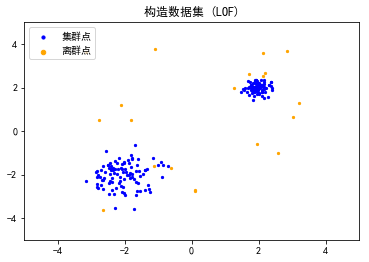

In [13]:
plt.title('构造数据集 (LOF)')
plt.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], color='b', s=5, label='集群点')
plt.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], color='orange', s=5, label='离群点')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

然后使用LocalOutlierFactor库对构造数据集进行训练，得到训练的标签和训练分数（局部离群值）。为了便于图形化展示，这里对训练分数进行了一些转换。

In [14]:
# 训练模型（找出每个数据的实际离群值）
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# 对单个数据集进行无监督检测时，以1和-1分别表示非离群点与离群点
y_pred = clf.fit_predict(X)

# 找出构造离群值与实际离群值不同的点
n_errors = y_pred != ground_truth
X_pred = np.c_[X,n_errors]

X_scores = clf.negative_outlier_factor_
# 实际离群值有正有负，转化为正数并保留其差异性（不是直接取绝对值）
X_scores_nor = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
X_pred = np.c_[X_pred,X_scores_nor]
X_pred = pd.DataFrame(X_pred,columns=['x','y','pred','scores'])

X_pred_same = X_pred[X_pred['pred'] == False]
X_pred_different = X_pred[X_pred['pred'] == True]

# 直观地看一看数据
X_pred

,x,y,pred,scores
0,1.913701,2.087875,0.0,0.000494
1,1.999748,2.212225,0.0,0.005255
2,2.040673,2.133115,0.0,0.001521
3,1.791277,1.743218,0.0,0.015652
4,1.991693,1.770405,0.0,0.010113
5,1.974831,2.204030,0.0,0.005188
6,2.205924,1.986534,0.0,0.022802
7,1.880050,2.048036,0.0,0.002938
8,1.558993,1.886954,0.0,0.044276
9,2.308499,2.136235,0.0,0.034563


将训练分数（离群程度）用圆直观地表示出来，并对构造标签与训练标签不一致的数据用不同颜色的圆进行标注。

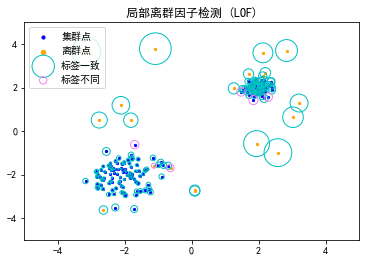

In [15]:
plt.title('局部离群因子检测 (LOF)')
plt.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], color='b', s=5, label='集群点')
plt.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], color='orange', s=5, label='离群点')

# 以标准化之后的局部离群值为半径画圆，以圆的大小直观表示出每个数据点的离群程度
plt.scatter(X_pred_same.values[:,0], X_pred_same.values[:, 1], 
            s=1000 * X_pred_same.values[:, 3], edgecolors='c', 
            facecolors='none', label='标签一致')
plt.scatter(X_pred_different.values[:, 0], X_pred_different.values[:, 1], 
            s=1000 * X_pred_different.values[:, 3], edgecolors='violet', 
            facecolors='none', label='标签不同')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

可以看出，模型成功区分出了大部分的离群点，一些因为随机原因散落在集群内部的“离群点”也被识别为集群内部的点，但是一些与集群略为分散的“集群点”则被识别为离群点。

同时可以看出，模型对于不同密度的集群有着较好的区分度，对于低密度集群与高密度集群使用了不同的密度阈值来区分是否离群点。

因此，我们从直观上可以得到一个印象，即基于LOF模型的离群点识别在某些情况下，可能比基于某种统计学分布规则的识别更加符合实际情况。

#### 学习使用PyOD库生成toy example并调用LOF算法

In [5]:
import pyod as py
# 获取数据集
contamination = 0.1  # 离群点百分比
n_train = 200  # 训练集样本量
n_test = 100  # 测试集样本量

X_train, y_train, X_test, y_test=py.utils.data.generate_data(n_train=n_train,n_test=n_test,
                                                             contamination=contamination)

/home/ma-user/anaconda3/lib/python3.6/site-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [6]:
from pyod.models.lof import LOF    

clf_name = 'LOF'
clf = LOF() # 初始化检测器clf
clf.fit(X_train) # 使用X_train训练检测器clf

# 返回训练数据X_train上的异常标签和异常分值
y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)

# 用训练好的clf来预测未知数据中的异常值
y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
y_test_scores = clf.decision_function(X_test)  #  返回未知数据上的异常值 (分值越大越异常)


On Test Data:
LOF ROC:0.7478, precision @ rank n:0.4


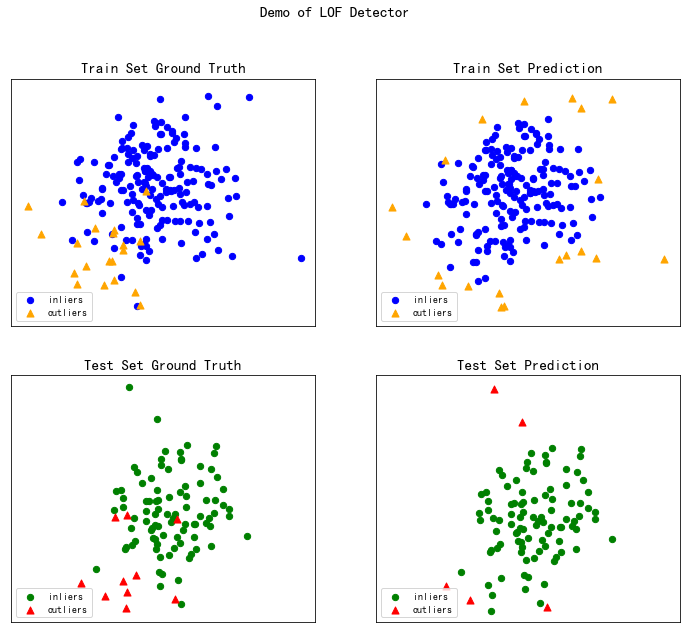

In [8]:
from pyod.utils.example import visualize
from pyod.utils.data import evaluate_print

# 评估预测结果
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# 可视化
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
    y_test_pred, show_figure=True, save_figure=False)

#### 用Pyod工具检测人工数据生成数据（使用KNN、HBOS、PCA、LOF）

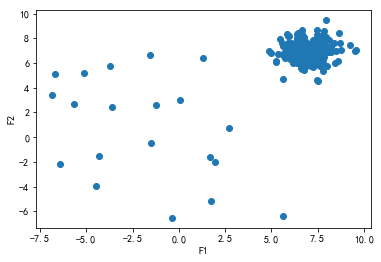

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
# 导入想要用来检测数据集中异常值的模型。使用KNN和HBOS：
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
from pyod.models.pca import PCA
from pyod.models.lof import LOF
# 创建一个带有异常值的随机数据集并绘制它
from pyod.utils.data import generate_data, get_outliers_inliers
# 生成数据
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)
# 在默认情况下，离群值在生成数据函数中是0.1
outlier_fraction = 0.1
# 将异常值和异常值存储在不同的numpy数组中
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)
n_inliers = len(x_inliers)
n_outliers = len(x_outliers)
#分离这两个特性并使用它来绘制数据
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)
# create a meshgrid
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
# scatter plot
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

No of Errors :  K Nearest Neighbors (KNN) 0
No of Errors :  HBOS 2
No of Errors :  PCA 0
No of Errors :  LOF 12


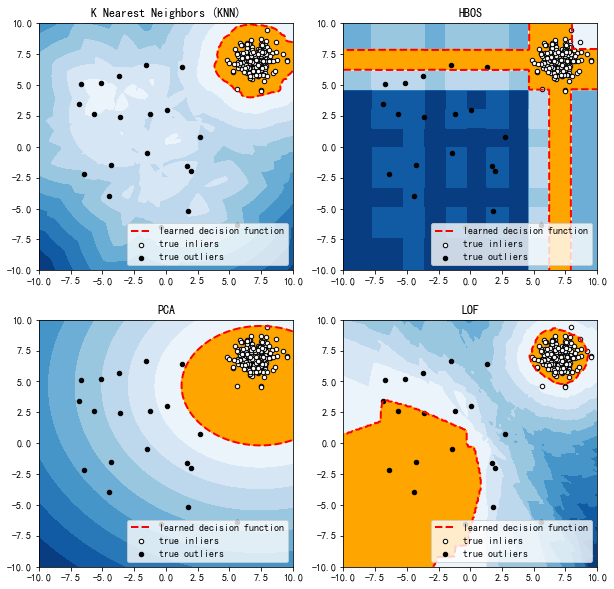

In [10]:
#创建一个dictionary并添加要用于检测异常值的所有模型：
classifiers = {
'K Nearest Neighbors (KNN)' : KNN(contamination=outlier_fraction),
'HBOS':HBOS(contamination=outlier_fraction),
'PCA':PCA(contamination=outlier_fraction),
'LOF':LOF(contamination=outlier_fraction)
}
#将数据拟合到我们在dictionary中添加的每个模型，然后，查看每个模型如何检测异常值：
#set the figure size
plt.figure(figsize=(10, 10))
for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)
    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)
    # rest of the code is to create the visualization
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    subplot = plt.subplot(2, 2, i + 1)
    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)
    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k')
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')
    subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true inliers', 'true outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='lower right')
    subplot.set_title(clf_name)
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))

plt.show()

#### Outlier detection with Local Outlier Factor (LOF

Automatically created module for IPython interactive environment


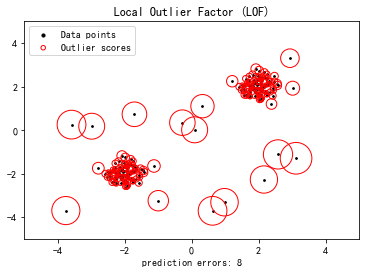

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()